In [1]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport

import re
# For handling string
import string
# For performing mathematical operations
import math

import sklearn
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

import scipy


from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [2]:
# Importing dataset
df1=pd.read_csv('Books_5_small.csv') 
df1["Product Type"]="Books"
df2=pd.read_csv('video_games_5.csv')
df2["Product Type"]="Video Games"
df3=pd.read_csv('Home_and_Kitchen_5_small.csv')
df3["Product Type"]="Home_and_Kitchen_5_small"

print("Shape of data=>",df1.shape)
print("Shape of data=>",df2.shape)
print("Shape of data=>",df3.shape)
#Reference:https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/=--

Shape of data=> (999913, 13)
Shape of data=> (487419, 13)
Shape of data=> (1999999, 13)


In [3]:
#Combining Datasets 
df=pd.concat([df1, df2, df3], ignore_index=True, sort=False)
print("Shape of data=>",df.shape)

Shape of data=> (3487331, 13)


In [4]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['label'],random_state=42)

In [5]:
#Reset Index
df_test=df_test.reset_index(drop=True)

In [6]:
print("Shape of data=>",df_test.shape)

Shape of data=> (348734, 13)


In [7]:
#Check if data is imbalanced
df['label'].value_counts()

0    2861165
1     626166
Name: label, dtype: int64

In [8]:
#Use sample as new dataset df
df=df_test

In [9]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()
pd.isna(df)
df.corr()

['reviewID',
 'overall',
 'vote',
 'verified',
 'reviewTime',
 'reviewerID',
 'asin',
 'reviewerName',
 'reviewText',
 'summary',
 'unixReviewTime',
 'label',
 'Product Type']

(348734, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348734 entries, 0 to 348733
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewID        348734 non-null  int64  
 1   overall         348734 non-null  float64
 2   vote            348734 non-null  int64  
 3   verified        348734 non-null  bool   
 4   reviewTime      348734 non-null  object 
 5   reviewerID      348734 non-null  object 
 6   asin            348734 non-null  object 
 7   reviewerName    348685 non-null  object 
 8   reviewText      348732 non-null  object 
 9   summary         348697 non-null  object 
 10  unixReviewTime  348734 non-null  int64  
 11  label           348734 non-null  int64  
 12  Product Type    348734 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 32.3+ MB


,count,mean,std,min,25%,50%,75%,max
reviewID,348734.0,7.509335e+05,5.551612e+05,8.0,2.898782e+05,6.278105e+05,1.129408e+06,2.000375e+06
overall,348734.0,4.320603e+00,1.124772e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
vote,348734.0,2.071797e+00,2.363427e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.301000e+03
unixReviewTime,348734.0,1.392243e+09,1.032597e+08,857779200.0,1.363997e+09,1.417910e+09,1.457309e+09,1.538006e+09
label,348734.0,1.795552e-01,3.838171e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


,reviewID,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,label,Product Type
0,956743,3.0,0,True,"02 22, 2015",AVEIJE0ETUPLP,0061441848,Luis B.,He didn't convinced me !,Three Stars,1424563200,0,Books
1,1037233,5.0,0,True,"12 30, 2016",A1B4V2B2C2SRQI,B00164M9XA,Malarina,Sturdier and heavier than I imagined. So glad ...,So glad I added these to my nativity this year,1483056000,0,Home_and_Kitchen_5_small
2,1683936,5.0,14,False,"06 5, 2013",AX88IZ9J4GGUX,B0025TLW6A,Crazy Plant Lady,I bought mine through Miele and had them insta...,Have Miele install it,1370390400,1,Home_and_Kitchen_5_small
3,905071,5.0,2,False,"03 21, 2009",A3RXEZ2XX8SOHI,0061209198,Roman Nies,The German physician and philosopher Heisenber...,"Quantum theory, crossing borders in the higlig...",1237593600,1,Books
4,699876,4.0,0,True,"05 19, 2017",A3LSTMKCXV541U,0060582006,kathleen kenneally,loved them all,Four Stars,1495152000,0,Books
5,214032,5.0,0,True,"07 15, 2014",A2O4RD41R56VFA,B0000DDV9C,LadyThornbird,This pad is great! It is easy to trim so you ...,This PAD is NO WIMP!,1405382400,0,Home_and_Kitchen_5_small
6,1000462,5.0,0,True,"03 4, 2017",A36S6OGOPQFNY9,B0014CX87U,Jim,Makes great coffee,Five Stars,1488585600,0,Home_and_Kitchen_5_small
7,194450,5.0,0,True,"03 3, 2014",A2RS1GCWB26STM,0007284241,Zane R. Nobbs,If you've ever wondered about the history behi...,Explores the Origins to the Lord of the Rings ...,1393804800,0,Books
8,427052,3.0,2,True,"12 7, 2009",A1IEY9G75SAFTK,B000BPUXAQ,Amazon Customer,these were a little expensive for how they wor...,Ok. Nothing great,1260144000,1,Home_and_Kitchen_5_small
9,61027,3.0,0,True,"04 6, 2014",A20LVHI8TEU4GD,B00004XRZT,Wren,I purchased a pair about 20 years ago. I love...,Made in China.,1396742400,0,Home_and_Kitchen_5_small


,reviewID,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,label,Product Type
348729,605809,4.0,0,True,"07 31, 2013",ABEAPPEWI7DPG,0060233370,Amazonian,I recognize a Newbery is for young folks (whic...,The book had me puzzled,1375228800,0,Books
348730,919248,4.0,0,True,"09 6, 2012",A2IEWBBT3W1279,0061245097,MichLC,I've enjoyed reading this series so far. It's ...,A sexy take on the world of vampire!,1346889600,0,Books
348731,1103879,5.0,0,True,"01 29, 2015",A27MLYDQDHFSX2,B000L3OHRS,A. Garcia,"These fit my bed and, with the wheels, brings ...",good value,1422489600,0,Home_and_Kitchen_5_small
348732,118909,2.0,0,True,"03 29, 2018",AUOV2TKG9MYD7,B00006IUWL,Robert Wagemaker,Too small. Picture does not adaquately portra...,Not accurately described; too small,1522281600,0,Home_and_Kitchen_5_small
348733,1713460,4.0,0,True,"12 11, 2016",A2ZN6EIAINFPKA,B0027IS7D0,Swanlake,I just wish they had the clips on them. Otherw...,No Clips Boo,1481414400,0,Home_and_Kitchen_5_small


,reviewID,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,label,Product Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348729,False,False,False,False,False,False,False,False,False,False,False,False,False
348730,False,False,False,False,False,False,False,False,False,False,False,False,False
348731,False,False,False,False,False,False,False,False,False,False,False,False,False
348732,False,False,False,False,False,False,False,False,False,False,False,False,False


,reviewID,overall,vote,verified,unixReviewTime,label
reviewID,1.000000,0.004031,-0.010687,0.186456,0.186586,-0.047381
overall,0.004031,1.000000,-0.036482,0.134240,0.085025,-0.197005
vote,-0.010687,-0.036482,1.000000,-0.071286,-0.120731,0.187383
verified,0.186456,0.134240,-0.071286,1.000000,0.488512,-0.262742
unixReviewTime,0.186586,0.085025,-0.120731,0.488512,1.000000,-0.425993
label,-0.047381,-0.197005,0.187383,-0.262742,-0.425993,1.000000


In [10]:
#Check for null values 
df.dropna(inplace=True)
df.isnull().sum()


reviewID          0
overall           0
vote              0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
label             0
Product Type      0
dtype: int64

,reviewText,word_count
0,He didn't convinced me !,5
1,Sturdier and heavier than I imagined. So glad ...,16
2,I bought mine through Miele and had them insta...,170
3,The German physician and philosopher Heisenber...,736
4,loved them all,3


(array([3.43313e+05, 4.48700e+03, 5.87000e+02, 1.75000e+02, 5.20000e+01,
        1.60000e+01, 5.00000e+00, 4.00000e+00, 4.00000e+00, 4.00000e+00]),
 array([1.0000e+00, 5.5250e+02, 1.1040e+03, 1.6555e+03, 2.2070e+03,
        2.7585e+03, 3.3100e+03, 3.8615e+03, 4.4130e+03, 4.9645e+03,
        5.5160e+03]),
 <BarContainer object of 10 artists>)

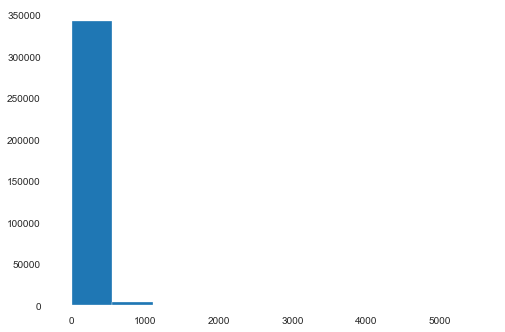

In [11]:
#Word Count of each review
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split(" ")))
df[['reviewText','word_count']].head()
plt.hist(df['word_count'])
plt.show()

,reviewText,char_count
0,He didn't convinced me !,24
1,Sturdier and heavier than I imagined. So glad ...,85
2,I bought mine through Miele and had them insta...,927
3,The German physician and philosopher Heisenber...,4506
4,loved them all,14


(array([3.43942e+05, 3.97200e+03, 5.24000e+02, 1.34000e+02, 4.70000e+01,
        1.20000e+01, 7.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00]),
 array([1.00000e+00, 3.24260e+03, 6.48420e+03, 9.72580e+03, 1.29674e+04,
        1.62090e+04, 1.94506e+04, 2.26922e+04, 2.59338e+04, 2.91754e+04,
        3.24170e+04]),
 <BarContainer object of 10 artists>)

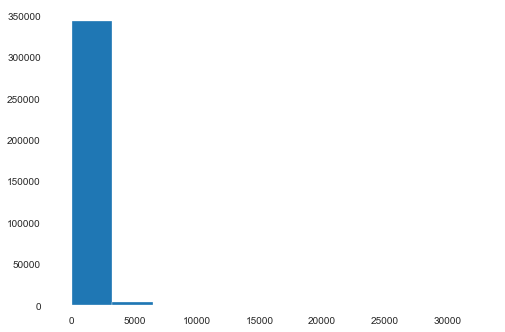

In [12]:
#Character Count of each review
df['char_count'] = df['reviewText'].str.len() ## this also includes spaces
df[['reviewText','char_count']].head()
plt.hist(df['char_count'])
plt.show()

In [13]:
df['asin'].unique()
print('Number of products=>',len(df['asin'].unique()))

array(['0061441848', 'B00164M9XA', 'B0025TLW6A', ..., 'B000ORE0DC',
       'B001L01CWI', 'B0027IS7D0'], dtype=object)

Number of products=> 45344


In [14]:
#Convert varified to 1's and 0's 

df["verified"] = df["verified"].astype(int)


In [15]:
# Remove ,,, from entries in name column
df['reviewText'] = df['reviewText'].str.replace(r'\,,,','')
df['reviewText'].unique()

array(["He didn't convinced me !",
       'Sturdier and heavier than I imagined. So glad I added these to my nativity this year.',
       "I bought mine through Miele and had them install it, which extends the warranty by 2 years. Mine is connected to my R/O water system, and that was not a problem for their installer. I have two other machines, both DeLonghis, and the Miele makes better coffee and espresso, is quieter, easier to maintain (yes, even with cleaning the milk pipe work, which isn't difficult), far easier to clean and much more reliable. The reason I have two DeLonghis is because one or the other was always in the shop. The price of this Miele is comparable to the DeLonghi Gran Dama, but this is a better machine (though the Gran Dama is fine in my greenhouse). If you're having cabinetry built for this unit, be sure there's no inner lip on your cabinet; otherwise some kludging will have to be done for a good fit (been there, done that). And if you're looking to spend a lot o

In [16]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviewText'][i])
    print()
    i=i+1
    


Review Number  0

He didn't convinced me !

Review Number  1

Sturdier and heavier than I imagined. So glad I added these to my nativity this year.

Review Number  2

I bought mine through Miele and had them install it, which extends the warranty by 2 years. Mine is connected to my R/O water system, and that was not a problem for their installer. I have two other machines, both DeLonghis, and the Miele makes better coffee and espresso, is quieter, easier to maintain (yes, even with cleaning the milk pipe work, which isn't difficult), far easier to clean and much more reliable. The reason I have two DeLonghis is because one or the other was always in the shop. The price of this Miele is comparable to the DeLonghi Gran Dama, but this is a better machine (though the Gran Dama is fine in my greenhouse). If you're having cabinetry built for this unit, be sure there's no inner lip on your cabinet; otherwise some kludging will have to be done for a good fit (been there, done that). And if you

In [17]:
#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviewText']=df['reviewText'].apply(lambda x:expand_contractions(x))
df['summary']=df['summary'].apply(lambda x:expand_contractions(x))

In [18]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviewText'][i])
    print()
    i=i+1
    

Review Number  0

He did not convinced me !

Review Number  1

Sturdier and heavier than I imagined. So glad I added these to my nativity this year.

Review Number  2

I bought mine through Miele and had them install it, which extends the warranty by 2 years. Mine is connected to my R/O water system, and that was not a problem for their installer. I have two other machines, both DeLonghis, and the Miele makes better coffee and espresso, is quieter, easier to maintain (yes, even with cleaning the milk pipe work, which is not difficult), far easier to clean and much more reliable. The reason I have two DeLonghis is because one or the other was always in the shop. The price of this Miele is comparable to the DeLonghi Gran Dama, but this is a better machine (though the Gran Dama is fine in my greenhouse). If you are having cabinetry built for this unit, be sure there is no inner lip on your cabinet; otherwise some kludging will have to be done for a good fit (been there, done that). And if

In [19]:
#Lowercase letters
df['reviewText']=df['reviewText'].str.lower()
df['summary']=df['summary'].str.lower()

In [20]:
#Remove digits and words containing digits 
df['reviewText']=df['reviewText'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['summary']=df['summary'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [21]:
#Remove Punctuations
df['reviewText']=df['reviewText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['summary']=df['summary'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [22]:
#Check first 30 reviews after cleaning 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviewText'][i])
    print()
    i=i+1

Review Number  0

he did not convinced me 

Review Number  1

sturdier and heavier than i imagined so glad i added these to my nativity this year

Review Number  2

i bought mine through miele and had them install it which extends the warranty by  years mine is connected to my ro water system and that was not a problem for their installer i have two other machines both delonghis and the miele makes better coffee and espresso is quieter easier to maintain yes even with cleaning the milk pipe work which is not difficult far easier to clean and much more reliable the reason i have two delonghis is because one or the other was always in the shop the price of this miele is comparable to the delonghi gran dama but this is a better machine though the gran dama is fine in my greenhouse if you are having cabinetry built for this unit be sure there is no inner lip on your cabinet otherwise some kludging will have to be done for a good fit been there done that and if you are looking to spend a lo

In [23]:
import nltk
#nltk.download()

In [24]:
#Commonly occuring words
freq = pd.Series(' '.join(df['reviewText']).split()).value_counts()[:10]
freq

the     1377583
and      767908
i        689036
to       673628
a        672702
is       629706
it       587366
of       536588
this     365262
in       341880
dtype: int64

In [25]:
#removal of commonly occuring irrelevant words
freq = list(freq)
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['reviewText'].head()

0                              he did not convinced me
1    sturdier and heavier than i imagined so glad i...
2    i bought mine through miele and had them insta...
3    the german physician and philosopher heisenber...
4                                       loved them all
Name: reviewText, dtype: object

In [26]:
#Count of rare words

freq_rare = pd.Series(' '.join(df['reviewText']).split()).value_counts()[-100:]
freq_rare

scrounges          1
leakingso          1
sevenand           1
cavingin           1
essaysgillespie    1
                  ..
doingblah          1
feellook           1
chingthis          1
annot              1
villianizes        1
Length: 100, dtype: int64

In [27]:
#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['reviewText'].head()

0                              he did not convinced me
1    sturdier and heavier than i imagined so glad i...
2    i bought mine through miele and had them insta...
3    the german physician and philosopher heisenber...
4                                       loved them all
Name: reviewText, dtype: object

In [28]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['reviewText.nostopwords'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['summary.nostopwords'] = df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(df)


        reviewID  overall  vote  verified   reviewTime      reviewerID  \
0         956743      3.0     0         1  02 22, 2015   AVEIJE0ETUPLP   
1        1037233      5.0     0         1  12 30, 2016  A1B4V2B2C2SRQI   
2        1683936      5.0    14         0   06 5, 2013   AX88IZ9J4GGUX   
3         905071      5.0     2         0  03 21, 2009  A3RXEZ2XX8SOHI   
4         699876      4.0     0         1  05 19, 2017  A3LSTMKCXV541U   
...          ...      ...   ...       ...          ...             ...   
348729    605809      4.0     0         1  07 31, 2013   ABEAPPEWI7DPG   
348730    919248      4.0     0         1   09 6, 2012  A2IEWBBT3W1279   
348731   1103879      5.0     0         1  01 29, 2015  A27MLYDQDHFSX2   
348732    118909      2.0     0         1  03 29, 2018   AUOV2TKG9MYD7   
348733   1713460      4.0     0         1  12 11, 2016  A2ZN6EIAINFPKA   

              asin        reviewerName  \
0       0061441848             Luis B.   
1       B00164M9XA         

In [29]:
#pip install textblob


In [30]:
#Lemmatization

from textblob import Word
df['reviewText.nostopwords.LEMMATIZED'] = df['reviewText.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['summary.nostopwords.LEMMATIZED'] = df['summary.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [31]:
df

,reviewID,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,label,Product Type,word_count,char_count,reviewText.nostopwords,summary.nostopwords,reviewText.nostopwords.LEMMATIZED,summary.nostopwords.LEMMATIZED
0,956743,3.0,0,1,"02 22, 2015",AVEIJE0ETUPLP,0061441848,Luis B.,he did not convinced me,three stars,1424563200,0,Books,5,24,convinced,three stars,convinced,three star
1,1037233,5.0,0,1,"12 30, 2016",A1B4V2B2C2SRQI,B00164M9XA,Malarina,sturdier and heavier than i imagined so glad i...,so glad i added these to my nativity this year,1483056000,0,Home_and_Kitchen_5_small,16,85,sturdier heavier imagined glad added nativity ...,glad added nativity year,sturdier heavier imagined glad added nativity ...,glad added nativity year
2,1683936,5.0,14,0,"06 5, 2013",AX88IZ9J4GGUX,B0025TLW6A,Crazy Plant Lady,i bought mine through miele and had them insta...,have miele install it,1370390400,1,Home_and_Kitchen_5_small,170,927,bought mine miele install extends warranty yea...,miele install,bought mine miele install extends warranty yea...,miele install
3,905071,5.0,2,0,"03 21, 2009",A3RXEZ2XX8SOHI,0061209198,Roman Nies,the german physician and philosopher heisenber...,quantum theory crossing borders in the higligh...,1237593600,1,Books,736,4506,german physician philosopher heisenberg counts...,quantum theory crossing borders higlight physics,german physician philosopher heisenberg count ...,quantum theory crossing border higlight physic
4,699876,4.0,0,1,"05 19, 2017",A3LSTMKCXV541U,0060582006,kathleen kenneally,loved them all,four stars,1495152000,0,Books,3,14,loved,four stars,loved,four star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348729,605809,4.0,0,1,"07 31, 2013",ABEAPPEWI7DPG,0060233370,Amazonian,i recognize a newbery is for young folks which...,the book had me puzzled,1375228800,0,Books,89,475,recognize newbery young folks well passed stor...,book puzzled,recognize newbery young folk well passed story...,book puzzled
348730,919248,4.0,0,1,"09 6, 2012",A2IEWBBT3W1279,0061245097,MichLC,i have enjoyed reading this series so far it i...,a sexy take on the world of vampire,1346889600,0,Books,26,150,enjoyed reading series far entertaining sexy k...,sexy take world vampire,enjoyed reading series far entertaining sexy k...,sexy take world vampire
348731,1103879,5.0,0,1,"01 29, 2015",A27MLYDQDHFSX2,B000L3OHRS,A. Garcia,these fit my bed and with the wheels brings my...,good value,1422489600,0,Home_and_Kitchen_5_small,30,150,fit bed wheels brings bed height prefer much d...,good value,fit bed wheel brings bed height prefer much du...,good value
348732,118909,2.0,0,1,"03 29, 2018",AUOV2TKG9MYD7,B00006IUWL,Robert Wagemaker,too small picture does not adaquately portrait...,not accurately described too small,1522281600,0,Home_and_Kitchen_5_small,13,81,small picture adaquately portrait actual size ...,accurately described small,small picture adaquately portrait actual size ...,accurately described small


In [32]:
#Sentiment Analysis 
from textblob import TextBlob
df['polarity']=df['reviewText.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01)
#fit the vectorizers to the data.

features = vectorizer.fit_transform(df['reviewText.nostopwords.LEMMATIZED'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())



In [34]:
features2 = vectorizer.transform(df['summary.nostopwords.LEMMATIZED'])
pandaframe2 = pd.DataFrame(features2.toarray(), columns=vectorizer.get_feature_names())


In [35]:
df1=df[['overall', 'verified','label','polarity','word_count']]
df2= pd.concat([pandaframe.reset_index(drop=True),pandaframe2.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [36]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("label") was dropped since it will be predicted using the model.
X = df2.drop(["label"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df2["label"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["label"].values)

In [ ]:
#Downsampling 
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=42,replacement=False)
#X_train=X_train.to_numpy()

#X_train, y_train = rus.fit_resample(X_train, y_train)




In [37]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=50000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=50000)

[[43590 13618]
 [ 3094  9428]]


(43590, 13618, 3094, 9428)

<AxesSubplot:>

AUC Score = 0.757

              precision    recall  f1-score   support

           0       0.93      0.76      0.84     57208
           1       0.41      0.75      0.53     12522

    accuracy                           0.76     69730
   macro avg       0.67      0.76      0.68     69730
weighted avg       0.84      0.76      0.78     69730



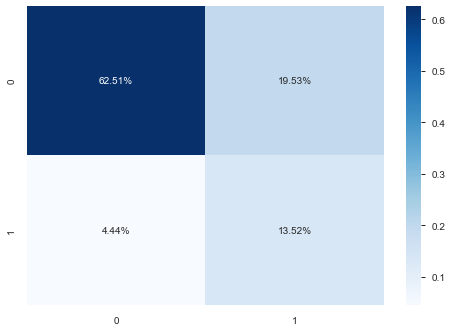

In [38]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Predicting performance of hypertuned Logistic Regression model

pred_val = log_reg.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

# Create Submission File on Test Data¶


In [39]:
test_df = pd.read_csv('reviews_kaggle.csv')

In [40]:
#304984
test_df

,reviewID,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,67000000,3,True,"05 16, 2012",A3IXM075VM1P9T,B007JYB3O2,nachtik,I would say these were 5 regular short stories...,average reading,1337126400
1,67000001,5,True,"12 25, 2012",A3LGZ7A3WSV3JJ,985719745,MSP,"WOW, DROPPIN DIMES 2 was SOOOOOOO GOOD, BETTER...",WOW.................,1356393600
2,67000002,5,True,"09 18, 2012",A3BF5G7CJNIAG0,B002KXH7PQ,C. S. DeMore,You'll love the pattern for witches in this bo...,Another Buggy Barn Delight,1347926400
3,67000003,5,False,"07 27, 2015",A2W41RTHSHYC4Q,B011LXVWRO,Light,For the majority of persons Algarve means beac...,This is a complete and practical guide book!,1437955200
4,67000004,5,False,"03 29, 2003",ACTBQZV1CJ9E8,9706061681,Richard Eastwood,MI MEJOR AMIGO..QUE ESPANTO ! La chica adelgaz...,LE ACABA DE SUCEDER A LA HIJA MAYOR DE,1048896000
...,...,...,...,...,...,...,...,...,...,...
304979,67304979,5,False,"06 4, 2017",A252410Y775ZJB,B00MKIOTOI,Liam,This book was dried with it's bullet point sty...,Brief but well done,1496534400
304980,67304980,5,True,"04 7, 2015",A2H6BX8UELPB24,B00VG3MF7Q,Robbie,I've always wanted to be a photographer and th...,great for aspiring photographers,1428364800
304981,67304981,5,True,"10 20, 2016",A3LCW3I11NQEY9,1502583356,Avid reader for many years,Sometimes it is just fun to read a good old lo...,Traditional Love Story,1476921600
304982,67304982,3,False,"11 18, 2017",A1PUT093NNXY1Q,1940576059,Wayne,Why must writers cater to the silly precepts o...,Beautiful People Strike Again.,1510963200


In [41]:
#Converting feature summary to a string
test_df['summary']=str(test_df['summary'])

,reviewText,word_count
0,I would say these were 5 regular short stories...,47
1,"WOW, DROPPIN DIMES 2 was SOOOOOOO GOOD, BETTER...",132
2,You'll love the pattern for witches in this bo...,44
3,For the majority of persons Algarve means beac...,160
4,MI MEJOR AMIGO..QUE ESPANTO ! La chica adelgaz...,84


(array([3.01058e+05, 3.49600e+03, 2.94000e+02, 9.80000e+01, 2.50000e+01,
        5.00000e+00, 2.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([1.0000e+00, 5.7870e+02, 1.1564e+03, 1.7341e+03, 2.3118e+03,
        2.8895e+03, 3.4672e+03, 4.0449e+03, 4.6226e+03, 5.2003e+03,
        5.7780e+03]),
 <BarContainer object of 10 artists>)

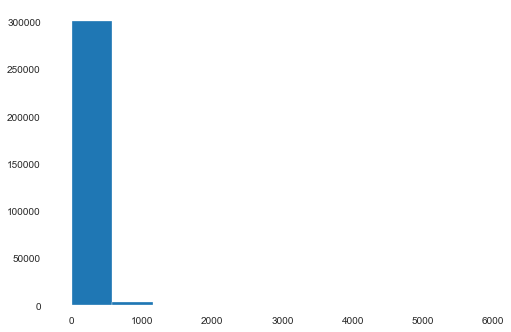

,reviewText,char_count
0,I would say these were 5 regular short stories...,261
1,"WOW, DROPPIN DIMES 2 was SOOOOOOO GOOD, BETTER...",729
2,You'll love the pattern for witches in this bo...,234
3,For the majority of persons Algarve means beac...,897
4,MI MEJOR AMIGO..QUE ESPANTO ! La chica adelgaz...,448


(array([3.01085e+05, 3.44300e+03, 3.19000e+02, 9.20000e+01, 2.50000e+01,
        8.00000e+00, 5.00000e+00, 1.00000e+00, 2.00000e+00, 4.00000e+00]),
 array([1.00000e+00, 3.26170e+03, 6.52240e+03, 9.78310e+03, 1.30438e+04,
        1.63045e+04, 1.95652e+04, 2.28259e+04, 2.60866e+04, 2.93473e+04,
        3.26080e+04]),
 <BarContainer object of 10 artists>)

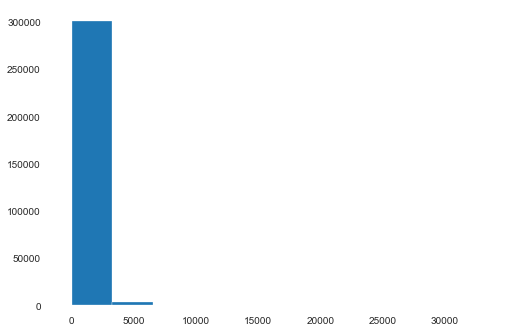

array(["I would say these were 5 regular short stories, nothing exceptional or to be worth recommending to others. I didn't read any full book or novel from this author, maybe that would be much better reading. But these short stories wouldn't convince me to go for it.",
       "WOW, DROPPIN DIMES 2 was SOOOOOOO GOOD, BETTER than pt. 1. A JUICY TALE of BETRAYAL, JEALOUSY, OBSESSION, a FEW CRAZY EX'S, TRUE LOVE, CONSEQUENCES to ACTIONS, PATERNITY TESTS, DRAMA, DRAMA, DRAMA, and MORE. ISIS was SOOOOOO SHIESTY. Although MAR'KEL made POOR CHOICES, with 3 POSSIBLE BABY DADDIES, I RESPECTED HER HONESTY. All THREE MEN TRULY LOVED HER, and the BABY. ONE had a FEW ISSUES. Who is the BABY DADDY? Which man will MAR'KEL CHOOSE? or Will the CHOICE be MADE for HER? BUY THIS BOOK and FIND OUT. YOU WILL NOT BE DISAPPOINTED. I was ENGROSSED and INTRIGUED to the VERY END. The way it ENDED, I KNOW a pt. 3 is in the FUTURE. I will be on PINS and NEEDLES ANTICIPATING its RELEASE. CHLOE JE'NORE, TWO THUMBS 

the     1368679
and      862695
a        751002
to       733957
i        644839
of       636241
is       626920
this     412029
it       411818
in       405964
dtype: int64

0    i would say these were regular short stories n...
1    wow droppin dimes was sooooooo good better tha...
2    youll love the pattern for witches in this boo...
3    for the majority of persons algarve means beac...
4    mi mejor amigoque espanto la chica adelgazaba ...
Name: reviewText, dtype: object

fromas              1
cthis               1
learningright       1
authoredwards       1
collaborationthe    1
                   ..
lsi                 1
horro               1
artyphil            1
seriesdavid         1
knute               1
Length: 100, dtype: int64

0    i would say these were regular short stories n...
1    wow droppin dimes was sooooooo good better tha...
2    youll love the pattern for witches in this boo...
3    for the majority of persons algarve means beac...
4    mi mejor amigoque espanto la chica adelgazaba ...
Name: reviewText, dtype: object

In [42]:
#Text Preprocessing

#Word Count of each review
test_df['word_count'] = test_df['reviewText'].apply(lambda x: len(str(x).split(" ")))
test_df[['reviewText','word_count']].head()
plt.hist(test_df['word_count'])
plt.show()

#Character Count of each review
test_df['char_count'] = test_df['reviewText'].str.len() ## this also includes spaces
test_df[['reviewText','char_count']].head()
plt.hist(test_df['char_count'])
plt.show()

#Convert varified to 1's and 0's 

test_df["verified"] = test_df["verified"].astype(int)

# Remove ,,, from entries in name column
test_df['reviewText'] = test_df['reviewText'].str.replace(r'\,,,','')
test_df['reviewText'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['reviewText']=test_df['reviewText'].apply(lambda x:expand_contractions(x))
test_df['summary']=test_df['summary'].apply(lambda x:expand_contractions(x))

#Lowercase letters
test_df['reviewText']=test_df['reviewText'].str.lower()
test_df['summary']=test_df['summary'].str.lower()

#Remove digits and words containing digits 
test_df['reviewText']=test_df['reviewText'].apply(lambda x: re.sub('\w*\d\w*','', x))
test_df['summary']=test_df['summary'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
test_df['reviewText']=test_df['reviewText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
test_df['summary']=test_df['summary'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(test_df['reviewText']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
test_df['reviewText'] = test_df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test_df['reviewText'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(test_df['reviewText']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
test_df['reviewText'] = test_df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test_df['reviewText'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test_df['reviewText.nostopwords'] = test_df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_df['summary.nostopwords'] = test_df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
test_df['reviewText.nostopwords.LEMMATIZED'] = test_df['reviewText.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_df['summmary.nostopwords.LEMMATIZED'] = test_df['summary.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Sentiment Analysis 
from textblob import TextBlob
test_df['polarity']=test_df['reviewText.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)
test_df['polarity']=test_df['reviewText.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)



In [43]:
#Text Vectorizer  

#fit the vectorizers to the data

features3= vectorizer.transform(test_df['reviewText.nostopwords.LEMMATIZED'])
pandaframe3 = pd.DataFrame(features3.toarray(), columns=vectorizer.get_feature_names())
features4 = vectorizer.transform(test_df['summmary.nostopwords.LEMMATIZED'])
pandaframe4 = pd.DataFrame(features4.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
pandaframe3.tail(30)

In [45]:
#Choose Features and combine word features with other features 

df4=test_df[['overall','reviewID','verified','polarity','word_count']]
df5= pd.concat([pandaframe3.reset_index(drop=True), df4.reset_index(drop=True),pandaframe4.reset_index(drop=True)], axis=1)

In [46]:
# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = df5.drop(['reviewID'], axis=1)

# Use your model to make predictions
pred_test = log_reg.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'reviewID': df5.reviewID, 'prediction': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('LR_NotTuned_extra_features_summary.csv', index=False)

[0 0 0 ... 0 0 0]


,reviewID,prediction
0,67000000,0
1,67000001,0
2,67000002,0
3,67000003,0
4,67000004,0


In [ ]:
from sklearn.model_selection import GridSearchCV

#Logistic Regression classifier with hyperparameter tuning 

parameters_grid = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga']}

# Create grid search object

LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit on data

%time LogReg_grid.fit(X_train, y_train)

LogReg_grid.best_params_ # printing out best parameters

In [ ]:
#Hypertuned Logistic Regression Result

# Use your model to make predictions
pred_test = LogReg_grid.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'reviewID': df5.reviewID, 'prediction': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('LR_Tuned.csv', index=False)

# Document Term Matrix (Another Approach)

In [ ]:
# Group stopwords and lemmatized reviews according to products
#df_grouped=df[['asin','reviewText.nostopwords.LEMMATIZED']].groupby(by='asin').agg(lambda x:' '.join(x))
#df_grouped

In [ ]:
#3 Creating Document Term Matrix
#from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer(analyzer='word')
#data=cv.fit_transform(df_grouped['reviewText.nostopwords.LEMMATIZED'])
#df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#df_dtm.index=df_grouped.index
#df_dtm.head(3)

#pandaframe

# Exploratory Analysis

In [ ]:
#pip install wordcloud

# Sentiment Analysis

In [ ]:
#Reviews with Highest Polarity 
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviewText']):
  print('Review {}:\n'.format(index+1),review)

In [ ]:
#Reviews with Lowest Polarity 
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviewText']):
  print('Review {}:\n'.format(index+1),review)

In [ ]:
#Plotting Polarity of different products
product_polarity_sorted=pd.DataFrame(df.groupby('asin')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [ ]:
#Plotting recommendation of different products
recommend_percentage=pd.DataFrame(((df.groupby('asin')['label'].sum()*100)/df.groupby('asin')['label'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['label'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['label']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

In [ ]:
#Checking readability of reviews


In [ ]:
#pip install textstat

In [ ]:
#Using textstat to determine readability, complexity and grade level of particular review
import textstat
df['dale_chall_score']=df['reviewText'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviewText'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviewText'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['label']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())

In [ ]:
#Checking if upvoted and not upvoted reviews are easility understandable by people who completed certain grade school
import textstat
df['text_standard']=df['reviewText'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['label']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['label']<=1]['text_standard'].mode())


In [ ]:
#Checking reading time for a review (Average adults reads 250 words per minute)

df['reading_time']=df['reviewText'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['label']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['label']<=1]['reading_time'].mean())

#People find longer reviews helpful

In [ ]:
df

In [ ]:
#Save file to CSV to be used in tableau 
df.to_csv('Amazon_Book_Video_home_EDA.csv')

In [ ]:
#conclusion from EDA on Amazon Product Revies

#Customers love products from Amazon. They find them a great purchase and easy to use
#Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product
#The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school
#The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful
 